In [ ]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
!apt-get install -y libproj-dev proj-data proj-bin \
                    libgeos-dev libgeos++-dev

# Cython과 pyshp 등 필요한 패키지 설치
!pip install cython numpy pyshp shapely

# Cartopy 설치
!pip install cartopy
print("Cartopy installed!")

import cartopy.crs as ccrs
import cartopy.feature as cfeature

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.12.1-1~jammy0).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (9.3.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.3.1-1~jammy0).
proj-data set to manually installed.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos++-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 620 kB of archives.
After this operation, 3,688 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 libgeos++-dev amd64 3.12.1-1~jammy0 [415 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.3.1-1~jammy0 [205 kB]
Fetched 620 kB in 1s (506 kB/s)
Selecting previously unselected package li

In [ ]:
fpath = '/content/drive/MyDrive/공모전/train_subway2021.csv'

In [ ]:
# 파일 불러오기
df = pd.read_csv(fpath)

# 컬럼명 지정
df=df[['시간', '호선', '역번호', '역명', '상하구분', 'AWS_지점코드','기온','풍향', '풍속', '일강수량','시간강수량','상대습도', '일사량', '체감온도', '혼잡도']]

# 좌표 컬럼 전처리 (쉼표 제거 및 'E', 'N' 제거 후 float 변환)
df['상대습도'] = pd.to_numeric(df['상대습도'].astype(str).str.replace(',', '').str.replace('E', ''), errors='coerce')
df['혼잡도'] = pd.to_numeric(df['혼잡도'].astype(str).str.replace(',', '').str.replace('N', ''), errors='coerce')

# 수치 데이터 컬럼 문자열 -> 숫자 변환 (쉼표 제거)
for col in ['상대습도','혼잡도']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# 음수 또는 특이값(-99, -999 등)을 NaN으로 처리
df.replace([-99, -999, -9999], np.nan, inplace=True)

# 또는 범용적으로 모든 수치형 컬럼에서 0보다 작은 값 제거 (결측 처리)
num_cols = ['상대습도','혼잡도']
for col in num_cols:
    df.loc[df[col] < 0, col] = np.nan

# 결측치 제거
df_clean = df.dropna(subset=['상대습도', '혼잡도'])
# 기본 통계 확인
print(df_clean.describe())

# 전처리된 결과 저장
df_clean.to_csv('/content/drive/MyDrive/공모전/train_AMTRA_clean.csv', index=False)


                 시간            호선           역번호      AWS_지점코드            기온  \
count  4.756539e+06  4.756539e+06  4.756539e+06  4.756539e+06  4.752091e+06   
mean   2.021071e+09  4.146865e+00  1.745194e+03  4.265137e+02  1.420900e+01   
std    3.429774e+04  2.232035e+00  1.184900e+03  1.505589e+02  1.076316e+01   
min    2.021010e+09  1.000000e+00  1.500000e+02  9.800000e+01 -2.520000e+01   
25%    2.021042e+09  2.000000e+00  4.110000e+02  4.060000e+02  6.400000e+00   
50%    2.021072e+09  4.000000e+00  1.910000e+03  4.130000e+02  1.530000e+01   
75%    2.021101e+09  6.000000e+00  2.639000e+03  4.330000e+02  2.290000e+01   
max    2.021123e+09  8.000000e+00  9.006000e+03  8.890000e+02  3.960000e+01   

                 풍향            풍속          일강수량         시간강수량          상대습도  \
count  4.749793e+06  4.749793e+06  4.707153e+06  4.704487e+06  4.756539e+06   
mean   1.794078e+02  1.682886e+00  1.549421e+00  1.319780e-01  6.460152e+01   
std    1.031882e+02  1.235274e+00  6.291983e+00  9.

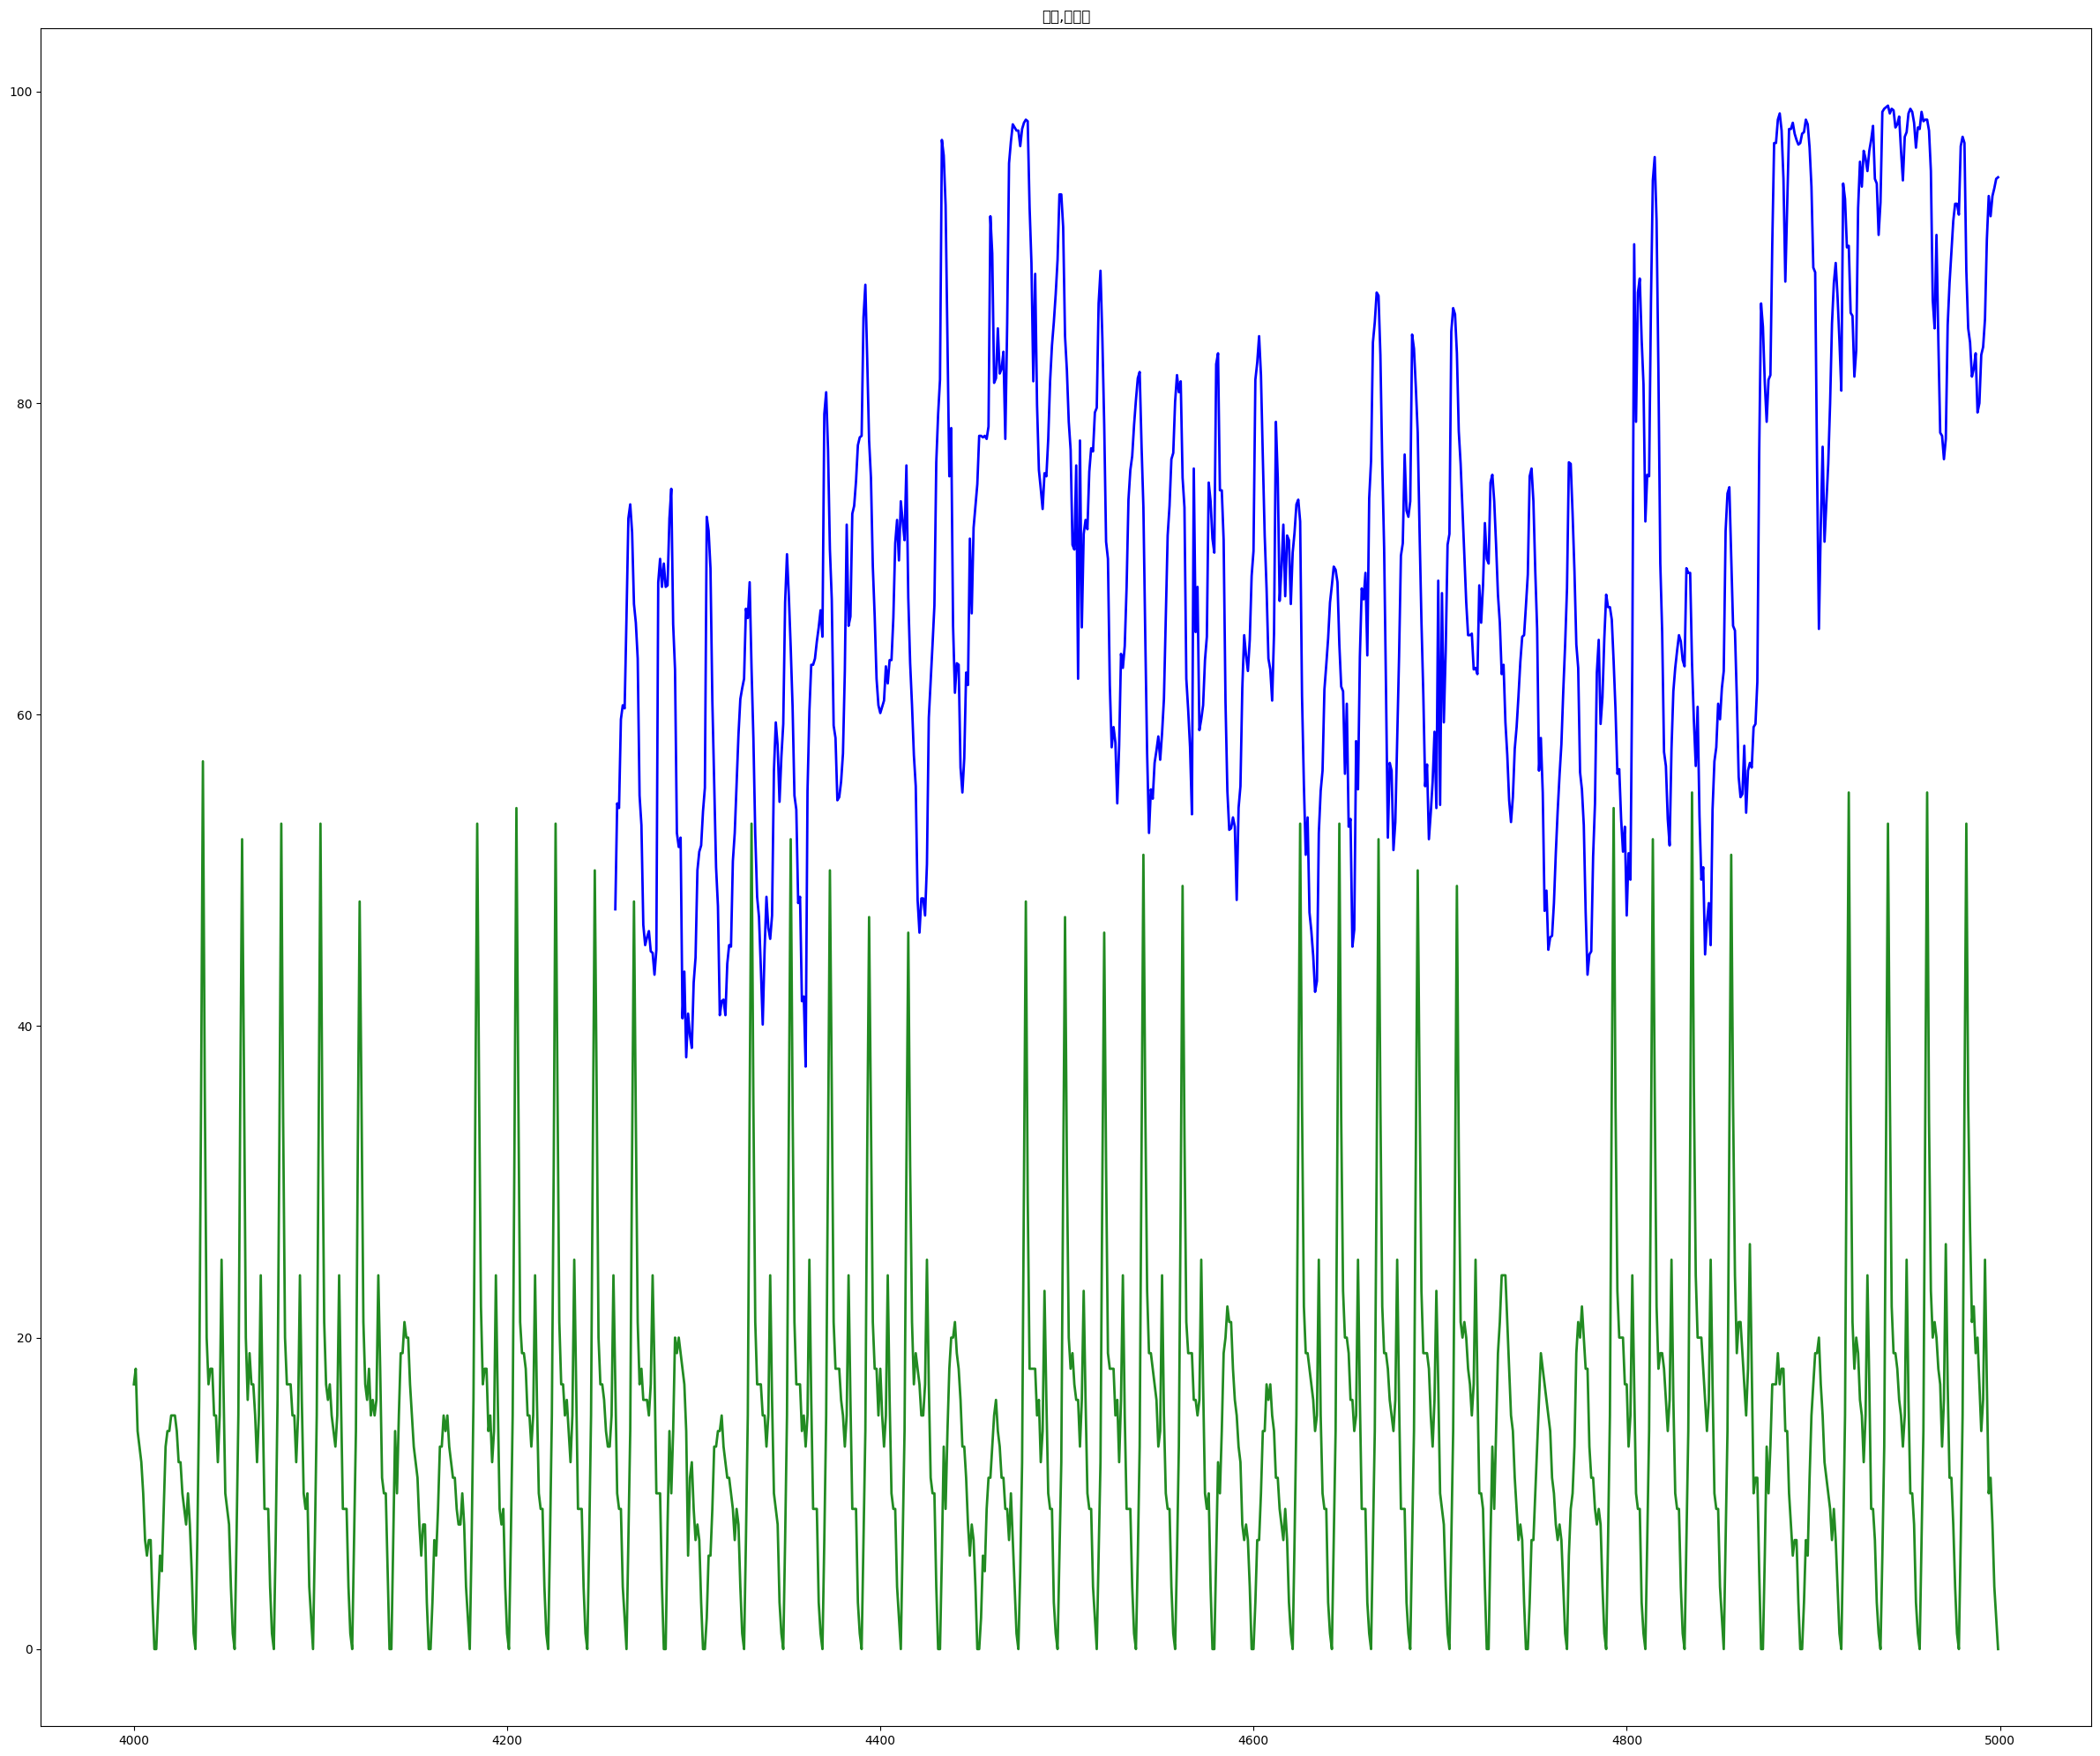

<Figure size 600x800 with 0 Axes>

In [ ]:
figure = plt.figure(figsize=(30,25)) # 전체 영역(도화지)
axes = figure.add_subplot()
plt.title("습도,혼잡도")
axes.plot(df['상대습도'][4000:5000],color='blue',linewidth=2.0)
axes.plot(df['혼잡도'][4000:5000],color='forestgreen',linewidth=2.0)
plt.figure(figsize=(6,8))
plt.savefig("/content/drive/MyDrive/공모전/train_AMTRA_clean.png", dpi=500)

plt.show()

<ipython-input-13-80994e0e2738>:14: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  plt.savefig("/content/drive/MyDrive/공모전/AMTRARelation.png", dpi=500)
<ipython-input-13-80994e0e2738>:14: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
  plt.savefig("/content/drive/MyDrive/공모전/AMTRARelation.png", dpi=500)
<ipython-input-13-80994e0e2738>:14: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.savefig("/content/drive/MyDrive/공모전/AMTRARelation.png", dpi=500)
<ipython-input-13-80994e0e2738>:14: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.savefig("/content/drive/MyDrive/공모전/AMTRARelation.png", dpi=500)
<ipython-input-13-80994e0e2738>:14: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.savefig("/content/drive/MyDrive/공모전/AMTRARelation.png", dpi=500)
<ipython-input-13-80994e0e2738>:14: User

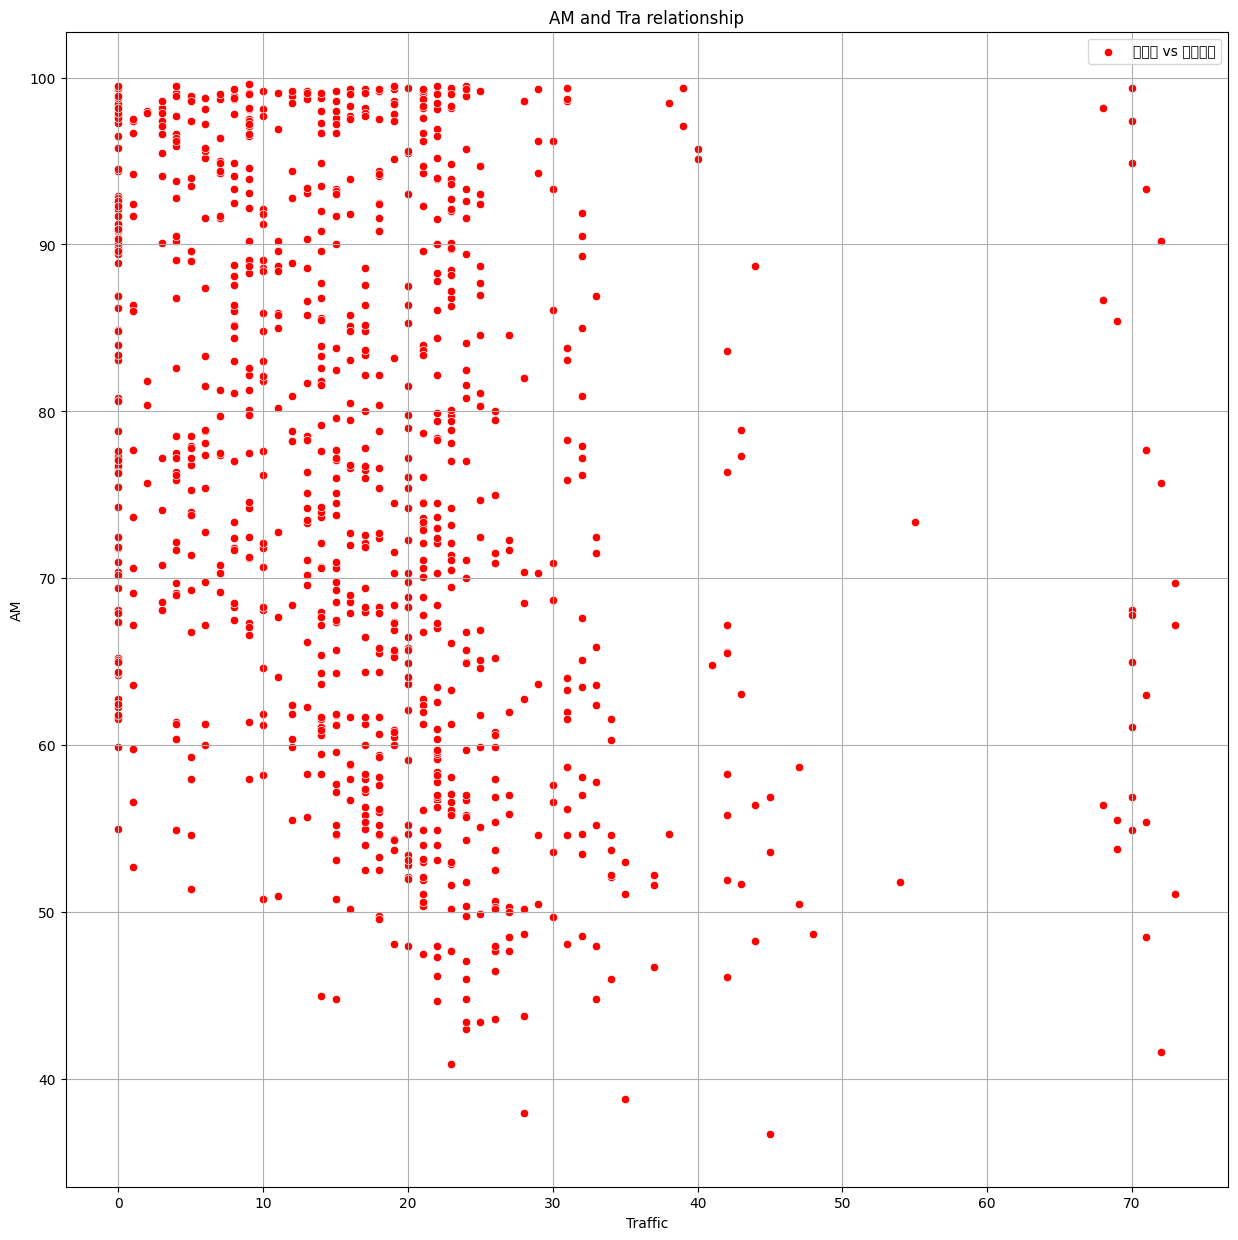

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도: 상대습도, 혼잡도
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_clean[4000:5000], x='혼잡도', y='상대습도', color='red', label='혼잡도 vs 상대습도')
plt.title('AM and Tra relationship')
plt.xlabel('Traffic')
plt.ylabel('AM')
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/MyDrive/공모전/AMTRARelation.png", dpi=500)
plt.show()


===== 상관계수 =====
          상대습도       혼잡도
상대습도  1.000000 -0.124599
혼잡도  -0.124599  1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
<ip

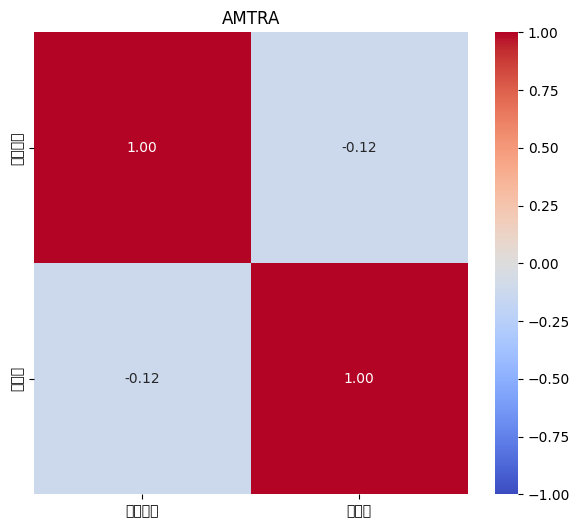

In [ ]:
# 상관계수 분석
corr_matrix = df_clean[['상대습도','혼잡도']].corr()

print("\n===== 상관계수 =====")
print(corr_matrix)

# 상관계수 히트맵
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('AMTRA')
plt.savefig("/content/drive/MyDrive/공모전/AMTRA_heatmap.png", dpi=300)
plt.show()